# Description des données

On utilise les bases fournies par le site https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/. On télécharge les données pour l'année 2016 pour commencer à visualiser les données

In [18]:
import pandas as pd

folder = "data/"
year = "2016"
files = ["usagers_", "vehicules_","lieux_", "caracteristiques_"]

dfs = []

for file in files:
    print( "loading database", file + year )
    df = pd.read_csv( folder + file + year + ".csv", delimiter =',', encoding="latin1")
    print( file, ' ', df.columns)
    dfs.append(df)

loading database usagers_2016
usagers_   Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')
loading database vehicules_2016
vehicules_   Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')
loading database lieux_2016
lieux_   Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')
loading database caracteristiques_2016
caracteristiques_   Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')


/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



On regarde les différentes colonnes

In [19]:
for db in dfs:
    print(db.columns)

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')
Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')
Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')
Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')


On peut essayer de faire une base de données combinées mais celle-ci est de peu de valeur étant donné qu'il y a plusieurs ligne pour un meme numéro d'accident ('Num_Acc')

In [20]:
# combined db
db_combined = dfs[0]
for i in range(3):
    db_combined = db_combined.merge(dfs[i+1], on='Num_Acc',how='left')

Examinons la catégorie 'catr' qui est celle assignée à notre groupe

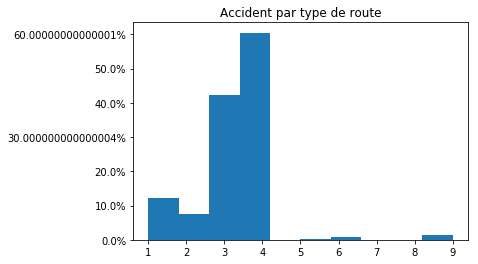

In [21]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
    
# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(dfs[2]['catr'], normed=True)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Accident par type de route')

plt.show()

On peut aussi sortir pour la base 3 ('lieux') les premières statistiques descriptives. Cela ne peut avoir aucun sens étant donné que les données sont numérisées

In [22]:
dfs[2].describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,5.943200e+04,59432.000000,458.000000,59320.000000,59268.000000,24963.000000,24920.000000,59222.000000,59276.000000,59254.000000,57594.000000,57809.000000,59286.000000,59130.000000,59139.000000,59125.000000
mean,2.016000e+11,3.322133,2.113537,1.831339,2.038942,32.611626,385.797151,0.136706,1.114195,1.174537,5.141299,50.192755,1.214874,0.436411,1.126482,47.384169
std,1.715668e+04,1.146852,0.317595,0.773313,1.347160,118.285631,356.885231,0.568819,0.619874,0.735746,21.061400,62.855237,0.880435,1.348488,0.757122,49.315412
min,2.016000e+11,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.016000e+11,3.000000,2.000000,1.000000,1.000000,3.000000,50.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,11.000000,350.000000,0.000000,1.000000,1.000000,0.000000,50.000000,1.000000,0.000000,1.000000,3.000000
75%,2.016000e+11,4.000000,2.000000,2.000000,2.000000,31.000000,630.000000,0.000000,1.000000,1.000000,0.000000,73.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,3.000000,4.000000,13.000000,8370.000000,5660.000000,3.000000,4.000000,4.000000,907.000000,999.000000,9.000000,7.000000,5.000000,99.000000


Examinons 'hrm' qui correspond à l'heure du sinistre

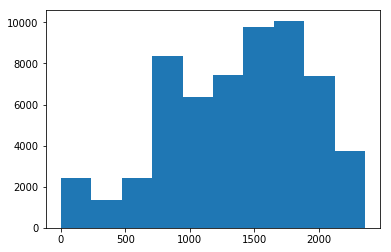

In [23]:
plt.hist( dfs[3]['hrmn'] )
plt.show()

Rajoutons des dictionnaires pour mieux expliquer les données

In [24]:
catr_dict = {
'1': 'Autoroute', 
'2': 'Nationale',
'3': 'Départementale',
'4': 'Voie Communale',
'5': 'Hors réseau public',
'6': 'Parc de stationnement',
'9': 'Autre'}

No handles with labels found to put in legend.


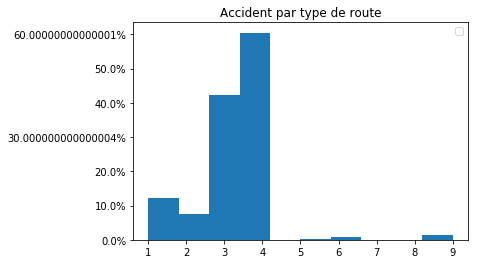

In [26]:
catr_labels = catr_dict.values()
bins = range(1, len(catr_dict)+2)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(dfs[2]['catr'].values, normed=True)
#plt.xticks( bins, catr_labels,  rotation=-45)
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.title('Accident par type de route')
plt.show()

In [38]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot #Ajouter plot pour enregistrer un html

init_notebook_mode(connected=True)
h = [go.Histogram(x=dfs[2]['catr'])]
iplot(h)

In [39]:
import numpy as np

table = dfs[0].merge(dfs[2])
np.set_printoptions(threshold=3)
t1 = pd.crosstab(table['grav'], table['catr'] , normalize='columns')

grav_dict = { 
1: 'indemne',
2: 'tue',
3: 'blesse',
4: 'blesse leger'}

print( t1  )
print(grav_dict)
print(catr_dict)

catr         1         2         3         4         5         6         9
grav                                                                      
1     0.454995  0.387865  0.362281  0.435786  0.372881  0.440636  0.412562
2     0.017637  0.045843  0.050469  0.010289  0.045198  0.017136  0.024268
3     0.131988  0.215393  0.313577  0.157146  0.299435  0.252142  0.216274
4     0.395379  0.350899  0.273674  0.396780  0.282486  0.290086  0.346895
{1: 'indemne', 2: 'tue', 3: 'blesse', 4: 'blesse leger'}
{'1': 'Autoroute', '4': 'Voie Communale', '5': 'Hors réseau public', '2': 'Nationale', '9': 'Autre', '3': 'Départementale', '6': 'Parc de stationnement'}


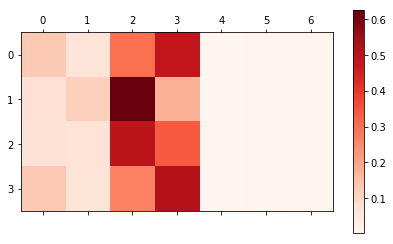

In [29]:
import matplotlib.cm as cm
plt.matshow( t1.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

catr         1         2         3         4         5         6         9
grav                                                                      
1     0.129048  0.064965  0.301651  0.488021  0.001176  0.005585  0.009554
2     0.064844  0.121094  0.628125  0.172656  0.002344  0.001563  0.009375
3     0.063546  0.065835  0.485870  0.368251  0.001737  0.004026  0.010736
4     0.123139  0.065603  0.261565  0.533648  0.000891  0.004368  0.010785


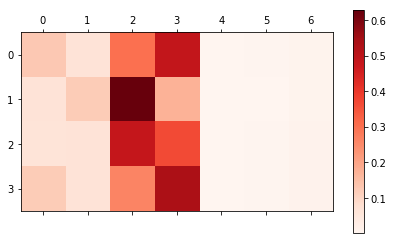

In [30]:
year = 1985
select = table['an_nais']>= year
t2 = pd.crosstab( table['grav'][select], table['catr'][select], normalize='index')

print( t2)
plt.matshow( t2.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

circ       0.0       1.0       2.0       3.0       4.0
grav                                                  
1     0.067240  0.190663  0.564820  0.171318  0.005959
2     0.047763  0.054900  0.766950  0.126544  0.003843
3     0.067915  0.115406  0.699505  0.112155  0.005018
4     0.064550  0.212867  0.540288  0.177047  0.005249


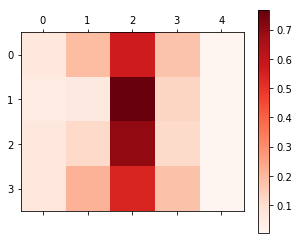

In [31]:
t2 = pd.crosstab( table['grav'], table['circ'], normalize='index')

print( t2)
plt.matshow( t2.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [32]:
pd.pivot_table(table,index=["catr","grav"],values=["trajet"],aggfunc=np.sum)

trajet
catr grav         
1    1     18617.0
     2       870.0
     3      5306.0
     4     16570.0
2    1      9977.0
     2      1411.0
     3      5668.0
     4      8348.0
3    1     50491.0
     2      8289.0
     3     45121.0
     4     36666.0
4    1     82607.0
     2      2343.0
     3     28240.0
     4     73390.0
5    1       227.0
     2        35.0
     3       200.0
     4       184.0
6    1      1140.0
     2        61.0
     3       684.0
     4       740.0
9    1      1327.0
     2        99.0
     3       978.0
     4       943.0

catr         1         2         3         4         5         6         9
circ                                                                      
0.0   0.068026  0.046946  0.235187  0.532475  0.006039  0.071445  0.039881
1.0   0.194748  0.049160  0.110546  0.632437  0.000924  0.003277  0.008908
2.0   0.002048  0.050018  0.463797  0.472027  0.001221  0.001208  0.009680
3.0   0.467046  0.157659  0.178420  0.193626  0.000094  0.000141  0.003013
4.0   0.052342  0.045455  0.389807  0.475207  0.005510  0.012397  0.019284


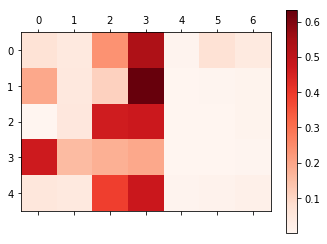

In [33]:
circ_dict = {
    1: 'sens unique',
    2: 'bidirectionel',
    3: 'chaussee separee',
    4: 'voies affectation variable'
}

t2 = pd.crosstab( table['circ'], table['catr'], normalize='index')

print( t2)
plt.matshow( t2.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()

In [34]:
total = table['circ'].shape[0]
terre_plein_central = table['circ'][table['circ'] != 2 ].shape[0]
print( (total - terre_plein_central)/ total )

0.5891981832081665


In [35]:
index = np.logical_and( table['circ'] == 2, np.logical_or(table['catr'] == 2,table['catr'] == 3) )
print( 'only national and departemental without central seperataion {:.2f}%'.format( 100 * index.sum() / index.shape[0] ) )

only national and departemental without central seperataion 30.27%


In [36]:
indexes2 = np.logical_or(table['catr'] == 2,table['catr'] == 3)
print( 'only national and departemental {:.2f}%'.format(indexes2.sum() / indexes2.shape[0] * 100 ) )

only national and departemental 40.65%


# Jour 2

(2978, 18) (20741, 18)
(23719, 19)
has_tpc     False     True 
grav                       
1        0.360392  0.406640
2        0.052913  0.028575
3        0.315356  0.179437
4        0.271339  0.385348


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



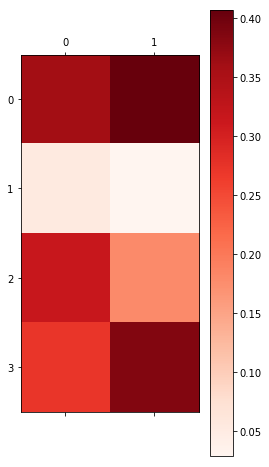

0: pas de tpc, 1: TPC
0: indemne, 1: mort, 2: blessé grave, 3: blessé léger


In [72]:
routes_nat_dep = np.logical_or(dfs[2]['catr'].values == 2, dfs[2]['catr'].values == 3)
tpc = dfs[2]['circ'].values == 3 #Est bidirectionnelle
nat_dep_tpc = np.logical_and(routes_nat_dep, tpc)
nat_dep_non_tpc = np.logical_and(routes_nat_dep, np.logical_not(tpc))
print(dfs[2][nat_dep_tpc].shape, dfs[2][nat_dep_non_tpc].shape)

lieux_interessants = dfs[2][routes_nat_dep]
lieux_interessants['has_tpc'] = nat_dep_tpc[routes_nat_dep]
print(lieux_interessants.shape)

tab = dfs[0].merge(lieux_interessants, how="inner")
crosstab = pd.crosstab(tab['grav'], tab['has_tpc'], normalize="columns")

print(crosstab)

plt.matshow(crosstab.values, cmap=cm.Reds, interpolation='none')
plt.colorbar()
plt.show()
print("0: pas de tpc, 1: TPC")
print("0: indemne, 1: mort, 2: blessé grave, 3: blessé léger")

In [82]:
# Test chi2 d’indépendance
import scipy.stats as scs
cd = pd.crosstab(tab['grav'], tab['has_tpc']).values
print(cd)
res_test = scs.chi2_contingency(crosstab_denormalized)
print("La p-value est de {:.2e}. Ce n’est pas beaucoup.".format(res_test[1]))

[[16973  2903]
 [ 2492   204]
 [14852  1281]
 [12779  2751]]
La p-value est de 5.52e-168. Ce n’est pas beaucoup.


In [85]:
# 2 contre 2
tab['mort_ou_grave'] = np.logical_or(tab['grav'] == 2, tab['grav'] == 3)
res_test_2 = scs.pearsonr(tab['has_tpc'].values, tab['mort_ou_grave'].values)
print(res_test_2)
p_value = res_test_2[1]
if res_test_2[0] > 0:
    p_value = 1
else:
    p_value *= 2
print("La p-value est de {:.2e}. Ce n’est pas beaucoup.".format(p_value))

(-0.11380856520507578, 8.854252272874222e-156)
La p-value est de 1.77e-155. Ce n’est pas beaucoup.
